# Code along from video
https://www.youtube.com/watch?v=V0u6bxQOUJ8
# GitHub from video
https://github.com/aprilypchen/depy2016
# Pre-Modeling: Data Preprocessing and Feature Exploration in Python

Data terminology
Inputs - Independent variables (also called features)
Predictors
Outputs - Dependent variable (also called the outcome)
The target variable for prediction
Models explain the effect that features have on the outcome

# Part 2: Introduce the Data
## Task: Given attributes about a person, predict whether their income is <=50K or >50K

In [25]:
# Import data and take a look
import numpy as np
import pandas as pd

df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [26]:
print(df.head(5))

    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0         

In [27]:
# Take a look at the outcome variable: 'income'
print(df['income'].value_counts())

<=50K    3779
>50K     1221
Name: income, dtype: int64


In [28]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('income', 1)
y = df.income

In [29]:
print(X.head(5))

    age         workclass    fnlwgt  education  education_num  \
0  39.0         State-gov   77516.0  Bachelors           13.0   
1  50.0  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38.0           Private  215646.0    HS-grad            9.0   
3  53.0           Private  234721.0       11th            7.0   
4  28.0           Private  338409.0  Bachelors           13.0   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black     NaN   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  
0          2174             0              40  United-States  
1             0             0         

In [30]:
print(y.head(5))

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


# Part 3: Basic data cleaning

## A. Dealing with data types

In [31]:
# Education is a categorical feature:
print(X['education'].head(5))

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object


In [32]:
# Use get_dummies in pandas 
# Another option: OneHotEncoder in sci-kit learn
print(pd.get_dummies(X['education']).head(5))

   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  ?  Assoc-acdm  Assoc-voc  \
0     0     0     0        0        0        0    0  0           0          0   
1     0     0     0        0        0        0    0  0           0          0   
2     0     0     0        0        0        0    0  0           0          0   
3     0     1     0        0        0        0    0  0           0          0   
4     0     0     0        0        0        0    0  0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          1          0        0        0          0            0   
1          1          0        0        0          0            0   
2          0          0        1        0          0            0   
3          0          0        0        0          0            0   
4          1          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             0  
4       

In [33]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'workclass' has 8 unique categories
Feature 'education' has 17 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 6 unique categories
Feature 'sex' has 3 unique categories
Feature 'native_country' has 40 unique categories


In [34]:
# Although, 'native_country' has a lot of unique categories, most categories only have a few observations
print(X['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    4465
Mexico            104
?                  97
Canada             28
Germany            22
Philippines        22
England            16
Puerto-Rico        16
El-Salvador        16
China              15
Name: native_country, dtype: int64


In [35]:
# In this case, bucket low frequecy categories as "Other"
X['native_country'] = ['United-States ' if x == 'United-States' else 'Other' for x in X['native_country']]

print(X['native_country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: native_country, dtype: int64


In [36]:
# Create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [37]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [38]:
X = dummy_df(X, todummy_list)
print(X.head(5))

    age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0          2174             0              40   
1  50.0   83311.0           13.0             0             0              13   
2  38.0  215646.0            9.0             0             0              40   
3  53.0  234721.0            7.0             0             0              40   
4  28.0  338409.0           13.0             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0            0                      0                    0                  0   
1            0                      0                    0                  0   
2            0                      0                    0                  1   
3            0                      0                    0                  1   
4            0                      0                    0                  1   

   ...  relationship_Wife  race_

## B. Handling missing data

In [39]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_7th-8th        0
dtype: int64

In [55]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39.0,77516.0,13.0,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50.0,83311.0,13.0,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38.0,215646.0,9.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53.0,234721.0,7.0,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,28.0,338409.0,13.0,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43.0,222971.0,3.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
4996,31.0,259425.0,9.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4997,47.0,212120.0,9.0,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4998,NaN,245880.0,9.0,0,0,60,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [47]:
# from sklearn.preprocessing import Imputer was deprecated with scikit-learn v0.20.4 and removed as of v0.22.2.
from sklearn.impute import SimpleImputer

In [48]:
# Impute missing values using Imputer in sklearn.preprocessing
# from sklearn.preprocessing import Imputer
## from sklearn.preprocessing import Imputer was deprecated with scikit-learn v0.20.4 and removed as of v0.22.2.

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

TypeError: __init__() got an unexpected keyword argument 'axis'

In [49]:
# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_7th-8th        0
dtype: int64

# Part 4: More Data Exploration

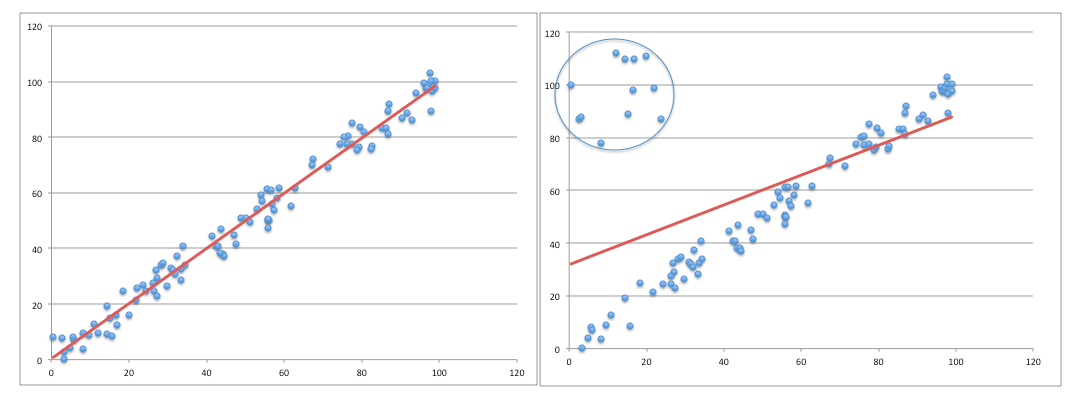

In [56]:
from IPython.display import Image
Image(filename='outliers.jpg')

In [57]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [58]:
tukey_indices, tukey_values = find_outliers_tukey(X['age'])
print(np.sort(tukey_values))

[]


In [59]:
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39.0,77516.0,13.0,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50.0,83311.0,13.0,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38.0,215646.0,9.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,53.0,234721.0,7.0,0,0,40,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,28.0,338409.0,13.0,0,0,40,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43.0,222971.0,3.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
4996,31.0,259425.0,9.0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4997,47.0,212120.0,9.0,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4998,NaN,245880.0,9.0,0,0,60,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
